In [1]:
%matplotlib inline
import torch as tc
import tensorflow as tf
import mxnet as mx
from mxnet import np as mxnp
from mxnet import npx as npx
npx.set_np()
import numpy as np

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

tc.__version__,tf.__version__,mx.__version__

('1.6.0', '2.3.1', '1.7.0')

## mxnet

In [2]:
from mxnet import gluon


In [3]:
std=0.01
batch_size = 256
train_iter, test_iter = mxd2l.load_data_fashion_mnist(batch_size)

In [4]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

In [5]:
W1 = mxnp.random.normal(scale=std,size=(num_inputs,num_hiddens))
W2 = mxnp.random.normal(scale=std,size=(num_hiddens,num_outputs))

In [6]:
b1 = mxnp.zeros(num_hiddens)
b2 = mxnp.zeros(num_outputs)

In [7]:
params = [W1,b1,W2,b2]

In [8]:
for  param in params:
    param.attach_grad()

In [9]:
def relu(X):
    return np.maximum(X,0)

In [10]:
def net(X):
    X=X.reshape((-1,num_inputs))
    H = relu(mxnp.dot(X, W1) + b1)
    return mxnp.dot(H, W2) + b2
#     X=X@W1+b1
#     X=relu(X)
#     X=X@W2+b2
#     return X
### 两种写法效果是一样的

In [11]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

In [12]:
num_epochs, lr = 10, 0.1

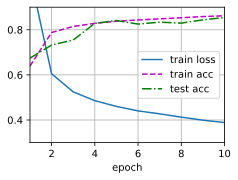

In [13]:
mxd2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,lambda batch_size:mxd2l.sgd(params,lr,batch_size))

In [14]:
mxd2l.context.current_context()

cpu(0)

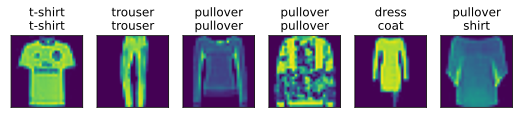

In [15]:
mxd2l.predict_ch3(net, test_iter)

## torch

In [16]:
from torch import nn

batch_size = 256
train_iter, test_iter = tcd2l.load_data_fashion_mnist(batch_size)

In [17]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

In [18]:
W1=nn.Parameter(tc.randn(num_inputs,num_hiddens,requires_grad=True)*std)
W2=nn.Parameter(tc.randn(num_hiddens,num_outputs,requires_grad=True)*std)

In [19]:
b1=nn.Parameter(tc.zeros(num_hiddens),requires_grad=True)
b2=nn.Parameter(tc.zeros(num_outputs),requires_grad=True)

In [20]:
params=[W1,b1,W2,b2]

In [21]:
def relu(X):
    a=tc.zeros_like(X)
    return tc.max(X,a)

In [25]:
def net(X:tc.tensor):
    X=X.reshape(-1,num_inputs)
    H=relu(X@W1+b1)
    return H@W2+b2

In [27]:
loss = nn.CrossEntropyLoss()

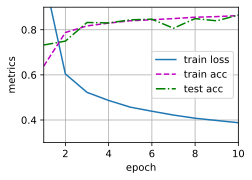

In [28]:
num_epochs, lr = 10, 0.1
updater = tc.optim.SGD(params, lr=lr)
tcd2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

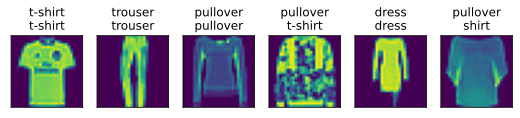

In [29]:
tcd2l.predict_ch3(net, test_iter)

## tensorflow

In [30]:
batch_size = 256
train_iter, test_iter = tfd2l.load_data_fashion_mnist(batch_size)

In [31]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

In [32]:
W1=tf.Variable(tf.random.normal(shape=(num_inputs,num_hiddens),stddev=0.01))
W2=tf.Variable(tf.random.normal(shape=(num_hiddens,num_outputs),stddev=0.01))

In [34]:
b1=tf.Variable(tf.zeros(num_hiddens))
b2=tf.Variable(tf.zeros(num_outputs))

In [35]:
params = [W1, b1, W2, b2]

In [36]:
def relu(X):
    return tf.math.maximum(X,0)

In [54]:
def net(X):
    X=tf.reshape(X,(-1,num_inputs))
    H=relu(tf.matmul(X,W1)+b1)
    X=tf.matmul(H,W2)+b2
    return X

In [55]:
def loss(y_hat,y):
    return tf.losses.sparse_categorical_crossentropy(y, y_hat,from_logits=True)

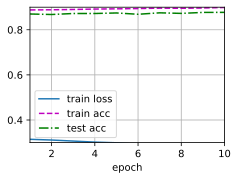

In [56]:
num_epochs, lr = 10, 0.1
updater = tfd2l.Updater(params, lr)
tfd2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

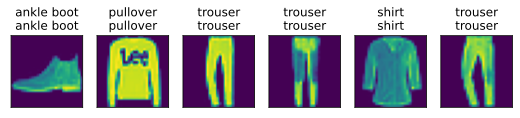

In [58]:
tfd2l.predict_ch3(net, test_iter)